# Eduworth

## Introduction
Total **3.9 million student** students will be graduating in 2019 which is **35%** of total U.S. population. 
The most encouraged path after high school is to continue education in college. There are total **7000+** universities and **300+** majors offered after post secondary education in US. As the post secondary enrollments increases over time, graduate expenses and student debts also grows. In 2019 year, total amount of student loan debt is **$1.64 trillion!** The rate of student debt delinquency is highest and growing compare to any other type of loan. Therefore, student must make an informed decision about different opportunities offered after high school about university, major, student debt etc.

The project tries to address following questions: 
1) Is college the most financially responsible post-secondary education option?<br>
2) Does the major of the degree and industry matter when going into college? 3) What can we predict with the data we have?

## Data Sources

1. <a href="https://nces.ed.gov/datalab/index.aspx">National Center for Education Statistics</a> allows us to select variables for the data that they collected from <a href="https://www.data.gov/education/">data.gov</a> and place them onto a table for us to visualize.
This dataset allows to create dynamic multiple table of information as per requirement, i.e. Student enrollment in different fields with years. We have cleaned and stored the table values in csv file in `data/` directory. 

2. <a href="https://collegescorecard.ed.gov/data/">College Scorecard</a><br>
We used this dataset for finding out additional information regarding the performance of students in classes.
This dataset stores number of files which has the data related to university over 1996-2019 year. Each file contains data for a specific year and each column in file contains all values for university course i.e. UG enrollment, debt, earning etc. The dataset is cleaned using `sean-eda.ipynb` to create interactive visualizations and ML model.

3. <a href="https://research.collegeboard.org/trends/student-aid">Trends in Student Aid 2019</a><br>This dataset gave us information on what kind of loans that students took out in 2019 and how much money they usually would takeout. Like (1) this dataset allows to create multiple table related to student debt which are stored in `data/`

NOTE:
More details about different data tables structure and data cleaning of CollegeScoreBoard data in `README.md`
All the data is from U.S. official therefore, accurate and trustworthy of time span 1997-2018 years

Dataframs from source (1) and (3) are small (50 rows) comparitively (38392 rows in (2)) requires very minor cleaning which was done manully. 
For datasource, CollegeScoreBoard dataset(2) is cleaned as following: 
There are 1000 columns of different data types and acronyms and even more rows in each file that represent all the different schools. We disregarded the not-required columns and recorded. There are large portions of the data that are "PrivacySuppressed” which do not disclose any information. Therefore, the rows with either null or PrivacySuppressed values are eliminated entirely. We needed to combine the earnings data with that statistics for each school which required the use of ```pd.merge```. This resulted in our final cleaned data file.

In [1]:
import pandas as pd
pd.set_option('mode.chained_assignment', None)
field_data = pd.read_csv('data/FieldOfStudyData1516_1617_PP.csv', low_memory = False)
field_data = field_data[['INSTNM', 'MD_EARN_WNE','CIPDESC']]
result = field_data[field_data.MD_EARN_WNE != 'PrivacySuppressed']
result['MD_EARN_WNE'] = result['MD_EARN_WNE'].astype(int)
result = result.groupby(['CIPDESC', 'INSTNM']).mean().astype(int).sort_values('CIPDESC')
result[:3]

MD_EARN_WNE
CIPDESC                          INSTNM                                             
Accounting and Computer Science. Lone Star College System                      28100
Accounting and Related Services. Southern Careers Institute-Pharr              19200
                                 Southern Careers Institute-San Antonio        19200

In [2]:
result = pd.read_csv('data/best_value_data.csv')
result[:4]

,INSTNM,ST_FIPS,STABBR,LATITUDE,LONGITUDE,SAT_AVG,UNITID,OPEID6,CONTROL,MAIN,...,COUNT,DEBTMEDIAN,DEBTPAYMENT10YR,DEBTMEAN,TITLEIVCOUNT,EARNINGSCOUNT,MD_EARN_WNE,IPEDSCOUNT1,IPEDSCOUNT2,BESTVALUE
0,Alabama A & M University,1,AL,34.783368,-86.568502,929.0,100654.0,1002,Public,1,...,25,36250,376,37194,33,33,54300,17.0,16.0,1.497931
1,Alabama A & M University,1,AL,34.783368,-86.568502,929.0,100654.0,1002,Public,1,...,46,31505,327,33085,32,31,25400,24.0,33.0,0.806221
2,Alabama A & M University,1,AL,34.783368,-86.568502,929.0,100654.0,1002,Public,1,...,22,34809,361,36482,33,31,54500,19.0,11.0,1.565687
3,Alabama A & M University,1,AL,34.783368,-86.568502,929.0,100654.0,1002,Public,1,...,PrivacySuppressed,36928,383,38900,24,24,45800,13.0,17.0,1.240251


# EDA and Data Visualization

![student_debt.png](student_debt.png)

![pie_chart.png](pie_chart.png)

**Visualization Takeaway**
1. ~30% of students have 10-25k student loan amount in 2014.
2. Most of the student graduates from Public universities and 50% students pursue Bachelor's degree.
3. The growth rate of graduation program tuition fees is higher than the growth rate of inflation in U.S. 
4. Student loan delinquent rate is growing higher than any other loan debts over the 2003-2019 years
5. The Student loan debt is increasing with amount over the years 2004-2014

![majo_selection.png](majo_selection.png)

Visit https://datastudio.google.com/open/1g6G-O8LygSsjNdDV32BJNbLDH6IjJqIA to see our visualization for the student debt and student earnings (one year post graduation) by major and school in table form. 

This visualization provides an easy way for students to see their prospective choices for a school. This does not provide intution though as how schools compare to each other.

For example, majoring in CS at Duke University the average earnings is 99,600 with a debt of 7,890. Majoring in CS at UIUC earns an average of 92,200 with a debt of 19,500. Comparing this to another university requires directly comparing the values which does not provide a good intution.

![best_value.png](best_value.png)

Visit https://datastudio.google.com/u/0/reporting/1UYDnVQdFf6_hKf1z2TgFMWtHsNvXl8s6/page/5WZNB to see our visualization for "Best Value" schools on a map of the United States

"Best Value" is where we took students major at each school and divided their earnings one year post graduation by their debt accumulated. This visualization provides prospective students to see what major at what schools provide the best value. You can search by state and by major.

An example is I want to go to school in either Iowa, Illinois, or Indiana and major in Computer Science. The most vibrant blue dot would show the highest value. In this instance Northwestern University provides the best value.
More EDA and implementation of first two visualization of student enrollment, student debt and graduation related trends are in `main.ipynb`. The preprocessing of the last two interactive visualization can be found `sean-eda.ipynb`

# Machine Learning

1. Classify the schools, majors and school+major using **SVM** and **K-Nearest Neighbors** models. SVM provided better accuracy than K-Nearest Neighbors

| Model | Accuracy | 
|-------|----------|
| Baseline Classifier | 0.5209 |
| KNN | 0.9090 |
| SVM | 0.9565 |


2. Predict largest major enrollment and diversity in overall enrollment at UIC in the year 2030 using **Tensorflow-Sequential** and **sklearn-LinearRegression** models. sklearn-LinearRegression provided better accuracy than Tensorflow-Sequential on average

| Model | MSE(Mean Square Error) | 
|-------|----------|
| Baseline Classifier | 0.4822 MSE |
| Tensorflow-Sequential | 0.00071866 MSE |
| sklearn-LinearRegression | 0.0001383 MSE |



### 1. Classification of schools and majors

To make classification possible, we needed to add some values to classify on. We were looking at the best value schools and deemed that a value of 1.5 and above would result in a sufficient amount of money to pay off your loans. So a True/False category was added into our dataframe. We tried 3 different parameter sets, (Major), (School), and (School Average)

Our baseline classifier for each of these was the DummyClassifier provided by ```sklearn```

Using the following script, one can generate the graphs shown below for classification tasks. Step-step implementation of the model can be found in `SVM_learner.ipynb`

Baseline Classifier Accuracy: 0.5507246376811594
SVM Accuracy: 0.9565217391304348


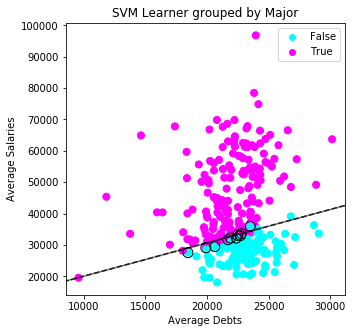

Baseline Classifier Accuracy: 0.49004285354171917


In [ ]:
from classifierClasses import *
ClassifyByMajor()  # Classification of different majors
ClassifyByAllSchools()  # Classification of different schools and their majors
ClassifyBySchool()  # Classification of schools
KNNClassifyByAllSchools()  # Classification using KNN

Our 1.5 value that we based our classification on is stating that this school or major or both is considered a good deal if the average salary is 1.5 that of the average debt. For each entree in each data set we determined this as a boolean true or false value. We ran the SVM classification on 3 sets of data: all schools and their available majors, group by major, group by school. We also ran the KNN classifier on the data set of all schools and their available majors. For each data set we trained the model using 3 features: the average salary, the average debt, and the good investment. We are predicting if given a school, major, or both is a finnacial good investment based on the salary and debt one is likely to graduate with.

### 2. Predict enrollment trend at UIC in 2030

This model is linear regression model to predict the trends of enrollment in different major at UIC after ten years. We have used the CollegeScoreBoard dataset, which provides the enrollments at UIC from year 1997-2019 in different major. We have first extracted UIC data from all csv files of different year using script present in `main.ipynb`.

Once we loaded the dataset, we have trained two different model on these data. Data is divided into 80-20 ratio for train-test. `sklearn-LinearRegression` model performed better. Using this model we predicted the % of women enrollment in 2030 at UIC and % of total enrollment in majors. The model predicted the Biology and Biomedical Sciences field as the largest number of graduates in 2030 at UIC.
Results from the `sklearn-LinearRegression` model is:
```
UGDS_WOMEN (Total share of enrollment of undergraduate): [0.47394529] with 0.9998616049654727 model accuracy
PCIP14 (Engineering): [0.07964474] with 0.9986632526877136 model accuracy
PCIP13 (Education): [0.02073632] with 0.9998491819905497 model accuracy
PCIP04 (Architecture And Related Services): [0.00564263] with 0.9999887105955678 model accuracy
PCIP23 (English Language And Literature/Letters): [9.84210526e-05] with 0.9999986375060621 model accuracy
PCIP26 (Biological And Biomedical Sciences): [0.18579421] with 0.9999733050205005 model accuracy
PCIP27 (Mathematics And Statistics): [0.01955632] with 0.9999819618702489 model accuracy
PCIP38 (Philosophy And Religious Studies): [0.00508895] with 0.9999920486317391 model accuracy
PCIP42 (Psychology): [0.17592526] with 0.9995786498511222 model accuracy
PCIP52 (Business, Management, Marketing): [0.14185684] with 0.9998232135106789 model accuracy
PCIP54 (History): [0.01673842] with 0.9999252473231763 model accuracy
```
More details about the implementation of the model can be found in `main.ipynb`



## Model Results

![model_results.jpg](model_results.jpg)

First three visualization shows result from the classification ML model. Each graph contains a decision bounder with the points circled black are in a support vector. They are too crowded to see the support vector boundary but they are there.

Second visualization shows result from linear regression model about the women enrollment. As we can see that both model Tensorflow and sklearn predicted contradict results, although both trained and tested on same data. It might be issue of lack of enough training data.


# Results

When high schoolers decide on what college they want to go to, they should first consider what degree they are trying to pursue. The visualization build in this project help them to understand the possible outcome of graduation, student debt and help to find the best value college, or major according to their preferences. 
The machine learning models are classifying the colleges and majors into two categories of best value or not. The other one is trying to predict the possible future enrollment trends at UIC. The future work can be merging employment data with student enrollment data published on CollegeScoreBoard dataset for visualization of major enrollments, dropouts, employments in different location, salaries distribution etc.